# Overfitting bei Decision Trees

Overfitting bedeutet, die Daten besser zu fitten, als sinnvoll ist. Sinnvoll bezieht sich hier auf die zugrundeliegende Struktur des Modells, welches die Daten generiert hat (und unbekannt ist). Es können auch Strukturen in den Daten gefittet werden, welche zufällig entstanden sind und beim nächsten Trainingssatz oder dem Validierungsdatensatz nicht mehr vorhanden sind (obwohl alle Daten aus der selben Grundgesamtheit gezogen wurden).

Dieses Beispiel illustriert dies. 
**Aufgabe:**
- Gehen Sie den folgenden Code durch und erklären/kommentieren Sie jeden Schritt. 
- Experimentieren Sie mit den Parameterwerten für `makeComplicated`, `really_random_margin`, `max_max_depth` und `cv_value`. Erklären Sie, was dabei passiert, und warum.
- Welche dieser Parameter sind bei einem realen Datensatz (z.B. dem Titanic-Datensatz) unter Ihrer Kontrolle?

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
makeComplicated=True #Vergleiche ein einfaches und ein komplizierteres datengenerierendes Modell
really_random_margin=0.3 #Breite des x-Streifens mit rein zufälligen Labels
max_max_depth=40 #maximaler max_depth-Wert
cv_value=10 #Cross-Validierung - AUFGABE: Was bedeutet dieser Parameter?
nRows_train=500
nRows_test=500
train_sizes=[2,5,10,20,50,100,200,440]

In [3]:
max_depth_range=range(1,max_max_depth)

In [4]:
def sample_data(nRows,makeComplicated=False,really_random_margin=0.1):
    """
    Erzeuge eine Stichprobe aus einer selbstgewählten Verteilung.
    """
    X=np.random.random((nRows,2))
    y=np.zeros((nRows,1))
    y[X[:,0]>0.5,:]=1
    y[X[:,0]<0.5,:]=0
    if makeComplicated:
        y[X[:,1]<0.3]=1
        y[X[:,1]>0.8]=0
        y[np.logical_and(X[:,1]>0.7,X[:,0]<0.1)]=1
        y[np.logical_and(X[:,0]>0.7,X[:,1]<0.1)]=0
        y[np.logical_and(X[:,1]>0.2,X[:,1]<0.4)]=1
        y[np.logical_and(X[:,0]>0.6,X[:,0]<0.8)]=0

    
    marginal_pts=np.logical_and((0.5-really_random_margin)<X[:,0],X[:,0]<(0.5+really_random_margin))
    y[marginal_pts,:]=np.random.randint(0,2,size=(marginal_pts.sum(),1))
    

    return X,y

In [5]:

Xtrain,ytrain=sample_data(nRows_train,makeComplicated=makeComplicated,really_random_margin=really_random_margin)
Xtest,ytest=sample_data(nRows_test,makeComplicated=makeComplicated,really_random_margin=really_random_margin)

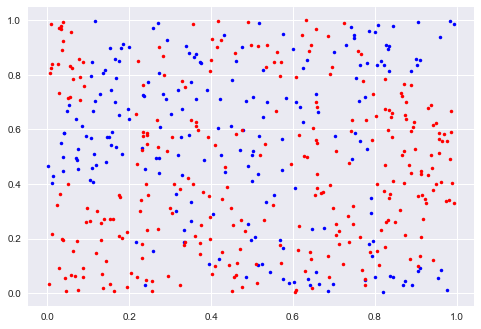

In [6]:
plt.plot(Xtrain[ytrain[:,0]==0,0],Xtrain[ytrain[:,0]==0,1],marker='.',ls='none',c='b');
plt.plot(Xtrain[ytrain[:,0]==1,0],Xtrain[ytrain[:,0]==1,1],marker='.',ls='none',c='r');

# Scores

In [7]:
clf=DecisionTreeClassifier(max_depth=25)
clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
from sklearn.metrics import accuracy_score
yhat_train=clf.predict(Xtrain)
yhat_test=clf.predict(Xtest)
accuracy_score(yhat_train,ytrain),accuracy_score(yhat_test,ytest)

(1.0, 0.71199999999999997)

# Validation Curve

In [9]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), Xtrain, ytrain.ravel(), param_name="max_depth", param_range=max_depth_range,
    cv=cv_value, scoring="accuracy", n_jobs=1)

In [10]:
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
test_scores_std=np.std(test_scores,axis=1)

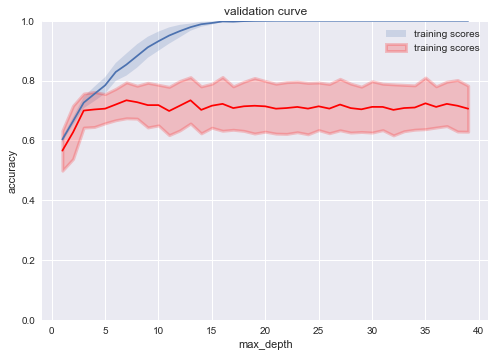

In [11]:
plt.plot(max_depth_range,train_scores_mean)
lw=3
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                  lw=lw,label='training scores');
plt.plot(max_depth_range,test_scores_mean,color='r')
plt.fill_between(max_depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                  color='r',lw=lw,label='training scores');
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.title('validation curve')
plt.ylim(0,1)
plt.legend();

# Learning Curve

In [12]:
from sklearn.model_selection import learning_curve

In [13]:
ytrain.shape

(500, 1)

In [14]:
train_sizes, train_scores, test_scores = learning_curve(
        DecisionTreeClassifier(max_depth=4), Xtrain, ytrain.ravel(), cv=cv_value, train_sizes=train_sizes)

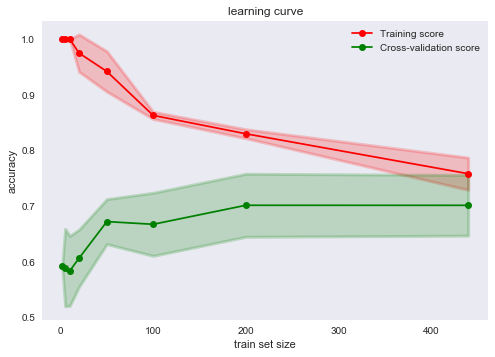

In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,lw=lw,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,lw=lw,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.ylabel('accuracy')
plt.xlabel('train set size')
plt.title('learning curve')
plt.legend();